In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import dates 

from datetime import datetime

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import seasonal data
df1 = pd.read_csv('../Data/airline_passengers.csv', parse_dates=True, index_col='Month')
df1.index.freq = 'MS'
print (df1.head())

# import non-seasonal data
df2 = pd.read_csv('../Data/DailyTotalFemaleBirths.csv', parse_dates=True, index_col='Date')
df2.index.freq = 'D'
print (df2.head())

            Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121
            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44


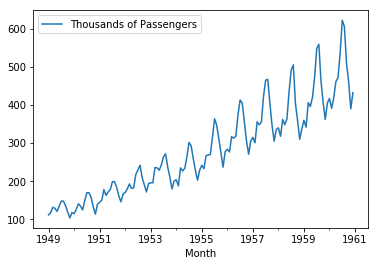

In [3]:
df1.plot()

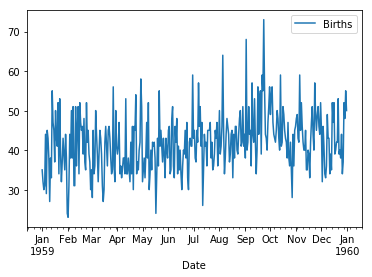

In [4]:
df2.plot()

### Augmented Dickey Fuller (adf) test

In [5]:
from statsmodels.tsa.stattools import adfuller

In [6]:
adfuller(df1['Thousands of Passengers'])

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [7]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        data series
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}
    regression : {'c','ct','ctt','nc'}
        Constant and trend order to include in regression
    
        * 'c' : constant only (default)
        * 'ct' : constant and trend
        * 'ctt' : constant, and linear and quadratic trend
        * 'nc' : no constant, no trend
    autolag : {'AIC', 'BIC', 't-stat', None}
        * if None, then maxlag lags are used
        * if 'AIC' (default) or 'BIC', then the number of lags is chosen
          to minimize the corresponding information 

In [8]:
dftest = adfuller(df1['Thousands of Passengers'])
dfout = pd.Series(dftest[0:4], index= ['adf','pvalue','usedlag','nobs'])

In [9]:
for key,val in dftest[4].items():
    dfout[f'critical value({key})'] = val

In [10]:
dfout

adf                      0.815369
pvalue                   0.991880
usedlag                 13.000000
nobs                   130.000000
critical value(1%)      -3.481682
critical value(5%)      -2.884042
critical value(10%)     -2.578770
dtype: float64

In [11]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [12]:
adf_test(df1['Thousands of Passengers'])

Augmented Dickey-Fuller Test: 
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [13]:
adf_test(df2['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


### Granger Causality Tests

In [14]:
df3 = pd.read_csv('../Data/samples.csv', parse_dates=True, index_col=0)
df3.index.freq = 'MS'

In [15]:
df3.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


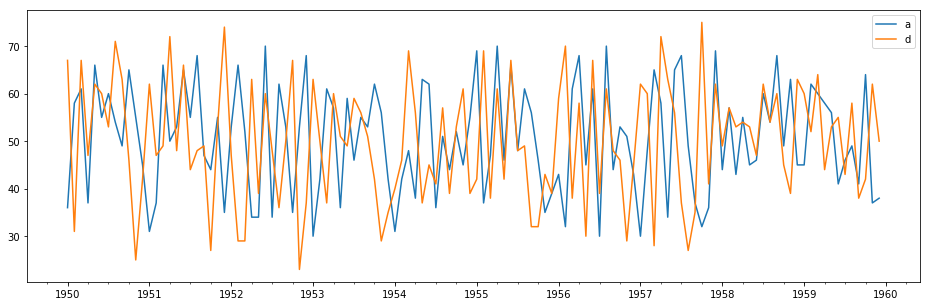

In [16]:
df3[['a','d']].plot(figsize=(16,5));

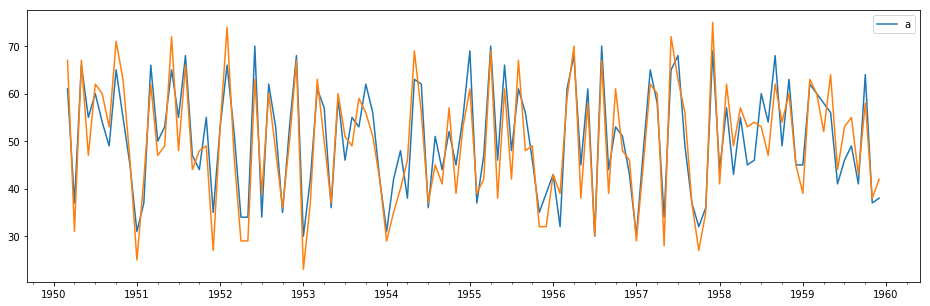

In [17]:
df3['a'].iloc[2:].plot(figsize=(16,5), legend=True)
df3['d'].shift(2).plot(figsize=(16,5));

In [18]:
from statsmodels.tsa.stattools import grangercausalitytests

In [19]:
grangercausalitytests(df3[['a','d']], maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


In [20]:
grangercausalitytests(df3[['b','d']], maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3


### Error metrics

In [21]:
np.random.seed(42)
df = pd.DataFrame(data=np.random.randint(20,30,(50,2)), columns=['test','pred'])

In [22]:
df.head()

,test,pred
0,26,23
1,27,24
2,26,29
3,22,26
4,27,24


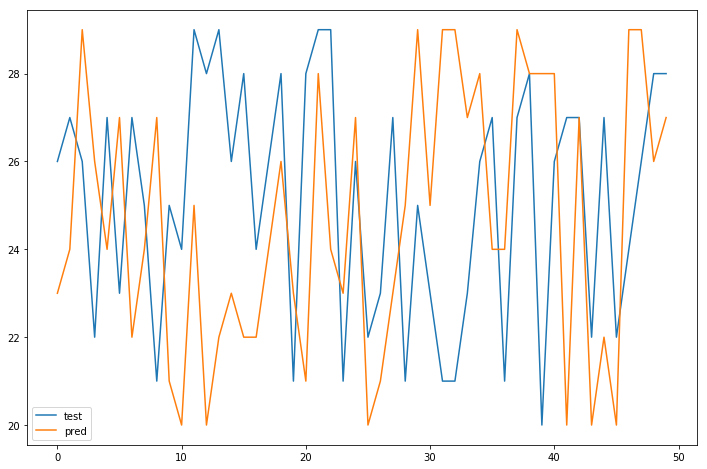

In [23]:
df.plot(figsize=(12,8))

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
def reg_eval_metrics (y_true,y_pred):
    
    MAE = mean_absolute_error(y_true=y_true,y_pred=y_pred)
    MSE = mean_squared_error(y_true=y_true,y_pred=y_pred)
    RMSE = np.sqrt(MSE)

    print ('MAE: ',MAE)
    print ('MSE: ',MSE)
    print ('RMSE: ',RMSE)

In [25]:
reg_eval_metrics (y_true=df['test'],y_pred=df['pred'])

MAE:  3.54
MSE:  17.02
RMSE:  4.125530268947253


### Seasonality

In [26]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot 

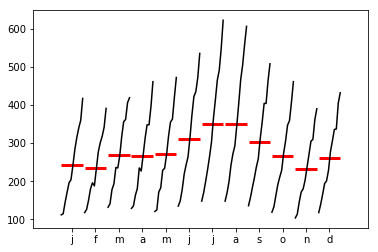

In [27]:
month_plot(df1['Thousands of Passengers']);

In [28]:
dfq = df1['Thousands of Passengers'].resample(rule='Q').mean()

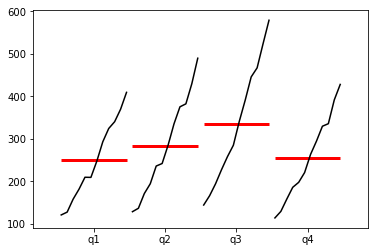

In [29]:
quarter_plot(dfq);